In [4]:
%matplotlib inline
#above command backend of inline command
#output of the inline command is displayed inline
#in inline new figure is automatically created
#backend effectively closes the figure object after executing each cell
%config InlineBackend.figure_format= 'retina'
#Display will be much better when using retina resolution

import numpy as np
import torch
import helper
import torch.utils.data
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-25 14:10:25--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-25 14:10:26 (70.2 MB/s) - ‘helper.py’ saved [2813/2813]



In [5]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:02, 3386365.13it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 48574.17it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:02, 816988.52it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


8192it [00:00, 18729.29it/s]            

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
#training data is loaded into trainloader
#training data in trainloader is made an iterator
#iterator is used to loop through datasets for training
#batchsize is the number of images we get in one iteration from dataloader
#Dataset may contain multiple trainset

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


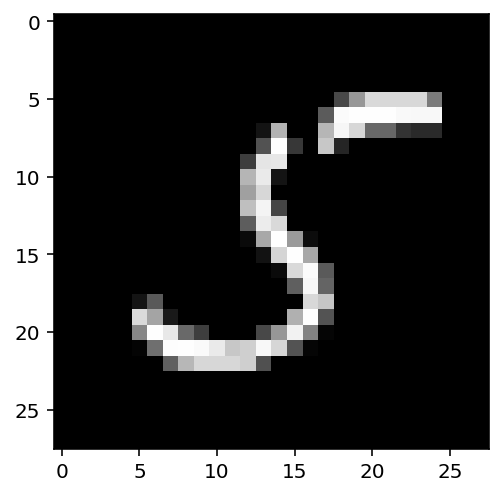

In [9]:
#64 image per batch, 1 color model
#To show any random picture
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

If there is any situation that you don't know how many rows you want but are sure of the number of columns, then you can specify this with a -1
<br /> **view method in images** <br /> view method returns a tensor with same 
data but with different shapes.<br /> *     pytorch view is same as numpy reshape





In [14]:
#First we use simple matrix multiplication
#.shape gives dimension of the image
#images.shape[0] gives first dimension as its 0
#images.view gives a new view 
#so in below case it makes the first dimension flatten into 784
def activation(x):
  return 1/(1+torch.exp(-x))
#Flatten the input image
inputs = images.view(images.shape[0],-1)
w1= torch.randn(784,256)
#randn returns a tensor filled with random number from normal distribution
b1 = torch.randn(256)
w2 = torch.randn(256,10)
b2 = torch.randn(10)
h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)
probabilities = softmax(out) 
print(probabilities.shape)
print(probabilities.sum(dim=1)) 

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
